<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Gamma_vs_Zeta_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Authored by Onri Jay Benally (2025)

Open Access (CC-BY-4.0)

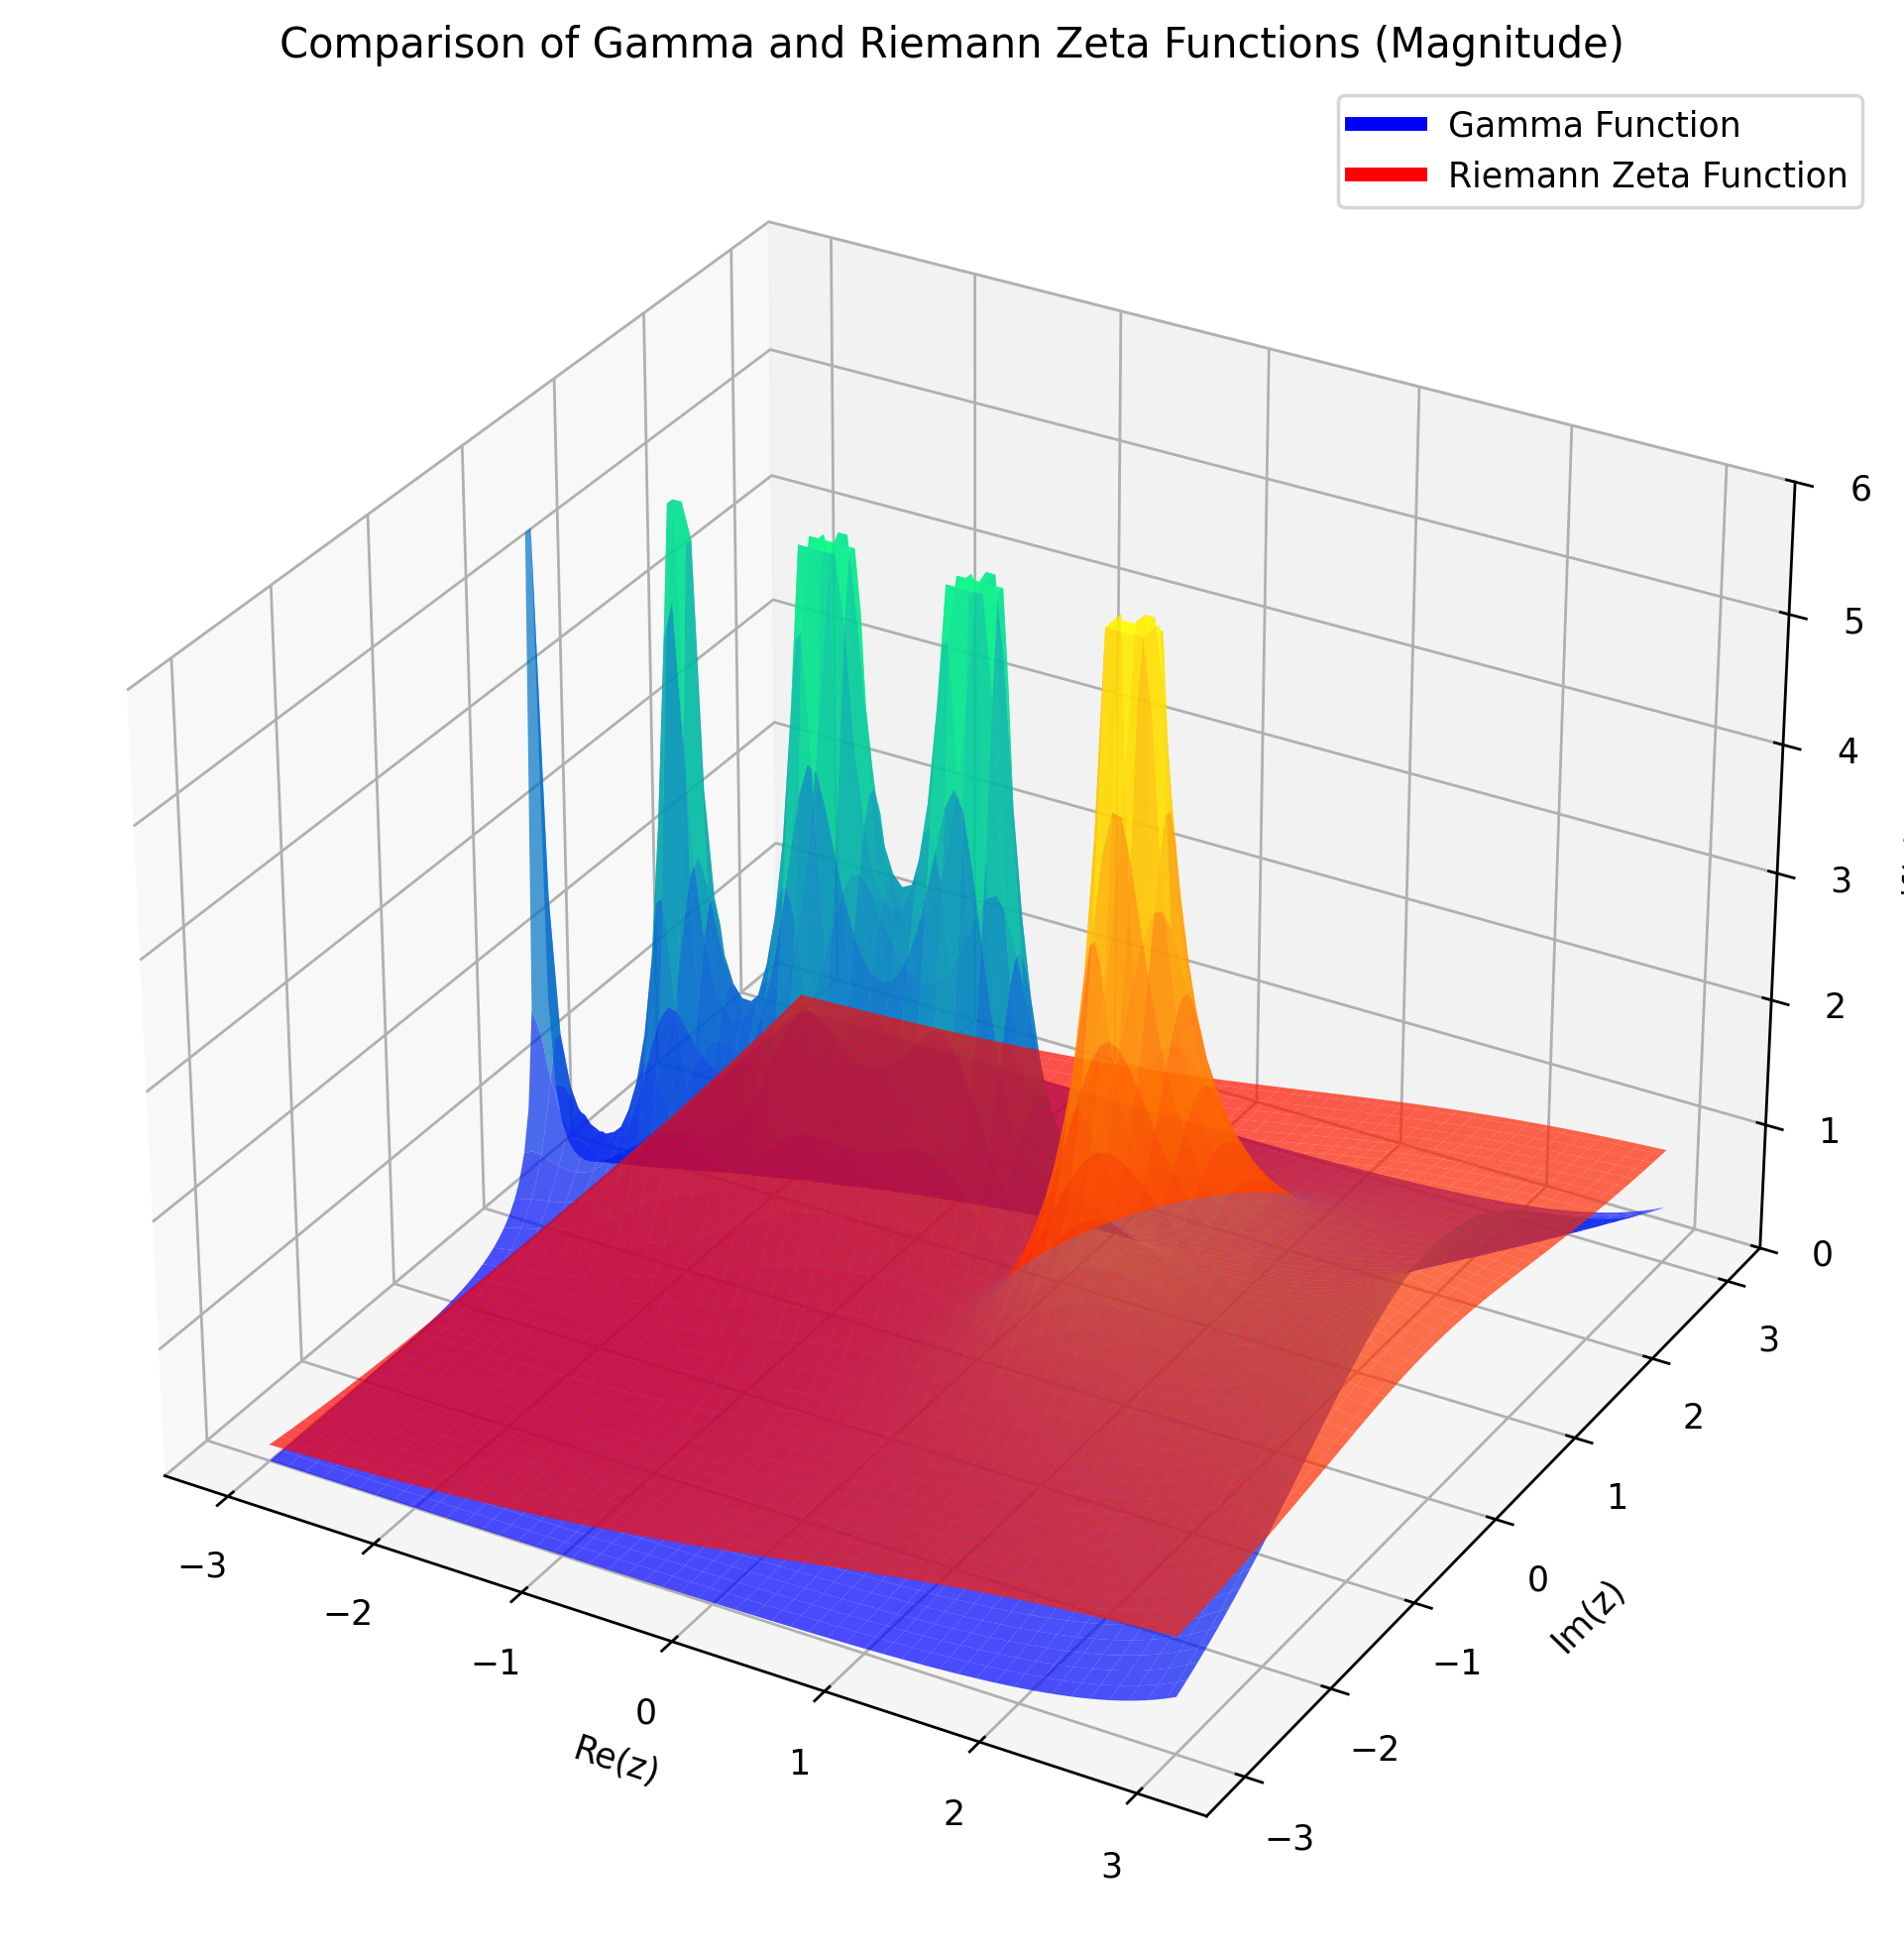

In [2]:
"""
Comparison of Gamma and Riemann Zeta Functions.

This script calculates and renders a 3D surface plot comparing the magnitude
of the Gamma function and the Riemann Zeta function over a complex grid.
It demonstrates the behavior of these functions, clipping values to avoid
infinite spikes near poles.
"""

import matplotlib.pyplot as plt
import mpmath
import numpy as np
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D  # Registers '3d' projection
from scipy.special import gamma

plt.rcParams['figure.dpi'] = 250


def plot_gamma_zeta_comparison():
    """
    Compute and plot the magnitude of Gamma and Zeta functions.

    This function generates a complex grid, computes the magnitude of the
    Gamma and Riemann Zeta functions, clips the values to a specified
    threshold to maintain visual clarity, and renders a 3D comparison plot.
    """
    # Configuration
    resolution = 100
    axis_min, axis_max = -3, 3
    threshold = 6

    # Define the grid
    x = np.linspace(axis_min, axis_max, resolution)
    y = np.linspace(axis_min, axis_max, resolution)
    x_grid, y_grid = np.meshgrid(x, y)
    z_complex = x_grid + 1j * y_grid

    # Compute Gamma (magnitude)
    # scipy.special.gamma supports complex numpy arrays natively
    w_gamma = np.abs(gamma(z_complex))

    # Compute Zeta (magnitude)
    # Use mpmath.fp for faster floating point calculations.
    # We must vectorize the function to apply it to the numpy array.
    vectorized_zeta = np.vectorize(lambda z: complex(mpmath.fp.zeta(z)))
    w_zeta = np.abs(vectorized_zeta(z_complex))

    # Clip the values to avoid spikes from poles dominating the plot
    w_gamma[w_gamma > threshold] = threshold
    w_zeta[w_zeta > threshold] = threshold

    # Plotting
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot Gamma Surface
    # Using 'winter' colormap for distinction
    ax.plot_surface(
        x_grid, y_grid, w_gamma,
        cmap='winter',
        alpha=0.7,
        rstride=2, cstride=2  # Optimization for smoother rendering
    )

    # Plot Zeta Surface
    # Using 'autumn' colormap for distinction
    ax.plot_surface(
        x_grid, y_grid, w_zeta,
        cmap='autumn',
        alpha=0.7,
        rstride=2, cstride=2
    )

    # Labels and Title
    ax.set_title(
        'Comparison of Gamma and Riemann Zeta Functions (Magnitude)'
    )
    ax.set_xlabel('Re(z)')
    ax.set_ylabel('Im(z)')
    ax.set_zlabel('|f(z)|')
    ax.set_zlim(0, threshold)

    # Manual Legend
    # Surface plots do not support automatic legends, so we create proxy lines
    legend_elements = [
        Line2D([0], [0], color='blue', lw=4, label='Gamma Function'),
        Line2D([0], [0], color='red', lw=4, label='Riemann Zeta Function')
    ]
    ax.legend(handles=legend_elements)

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    plot_gamma_zeta_comparison()